# Problem Statement

- We live in times where the internet is growing more rapidly than ever: it doubles in size every 12 months, and by 2020 its space will occupy about 44 zettabytes. Consequently, online consumers are exposed to a variety of offerings and are faced with a great amount of options before making a desired purchase. This means that consumers have a lot of alternatives to consider, channels and media to decide which option is the best for them.

- Translating these options into communication channels, one can make inference about the consumer’s path-to-purchase. A consumer purchase journey entails a part of a general customer experience which consists of distinct contacts (touchpoints) among the customer and the firm. Thus, the purchase journey can be defined as “the process a customer goes through, across all stages and touchpoints”.

- Businesses can derive insights from the navigational path so as to understand and maybe predict the online consumer behavior. A touchpoint refers to “a customer contact point, or a medium through which the firm and the customer interact”. Various researchers have divided the touchpoints into two basic categories: The customer-initiated or customer-owned contacts (CIC) and the firm-initiated or brand-owned contacts (FIC).

- A customer-initiated contact, by definition, is a contact that is initiated by a customer. This can be either a generic/ more specific search in a search engine machine, a type in the company’s website or an action made in an application. While a firm-initiated contact is any touch point that results from a company’s initiative and usually is also managed by it. Channels such as display, retargeting, affiliate and e-mail advertising have been classified as contacts initiated by the firm.  It is interesting to identify which of the touchpoint types is more effective and can lead to more conversions among consumers.

- One can make inference that the consumers are using multiple channels to evaluate alternatives, search information and make conversions. Thus, consumers’ interactions with the various channels, can lead to purchases from the company or make them buy from the competitors.

- Consumers initiating contacts by themselves are expected to have more conversions in the firm’s website. However, the nature of consumer purchase journey involves more than CICs; customers are also coming across with firm-initiated contacts which can influence their purchase decisions.

- Yet not all the consumers express the same preferences when navigating online; It is important to consider consumer heterogeneity across options and do not consider their behavior as a whole. Demographics and behavioral patterns differ among various segments and play a role throughout the path-to-purchase.

- Therefore, the main research question of Datathon is:
  - How do different consumer segments behave when they come across various touchpoints?

- In order to shed light to the main question, the following sub-questions are to be answered:
    - What is the effect of CICs on booking conversions?
    - Which are the consumer segments who engage in CICs and convert?
    - Can a firm-initiated contact make customers who have engaged in customer-initiated contacts with competitors, make them shift consideration?
    - Which segments are more likely to do so?
    
- For the study, data from a travel website will be used provided by GfK. These data contain series of various touchpoints, as well as consumer characteristics. Therefore, when the term conversion is used, it will be referred to travel bookings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importing Travel Data & Travel Data Demos

In [2]:
traveldata=pd.read_csv('D:/DataThon/Data Purchase Journey Travel/TravelData.csv')
traveldemos=pd.read_csv('D:/DataThon/Data Purchase Journey Travel/TravelDataDemos.csv')

In [3]:
traveldata['Date']=traveldata['TIMESPSS'].str.split(' ',expand=True)[0]

In [4]:
traveldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456414 entries, 0 to 2456413
Data columns (total 11 columns):
UserID          int64
PurchaseID      int64
TIMESPSS        object
Duration        float64
DEVICE_TYPE     object
type_touch      int64
purchase_own    int64
purchase_any    int64
MobilePanel     int64
FixedPanel      int64
Date            object
dtypes: float64(1), int64(7), object(3)
memory usage: 206.2+ MB


# Exploratory Data Analysis
- Exploring customers who have made a purchase from the company

### 1. Lets get the date on which most purchase have been made for the company

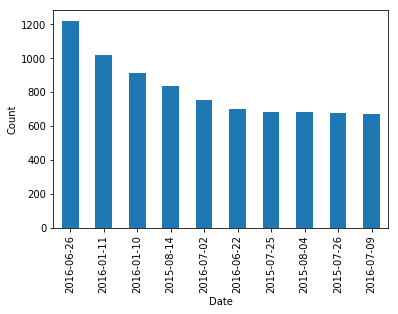

In [5]:
traveldata.query('purchase_any==1 and purchase_own==1').groupby('Date')['purchase_any'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Count')
plt.show()

- From above,we can analyze that on '2016-06-26' most of the purchase have been made.

### 2. Getting the users(Valuable Customers) who have made most of the purchase

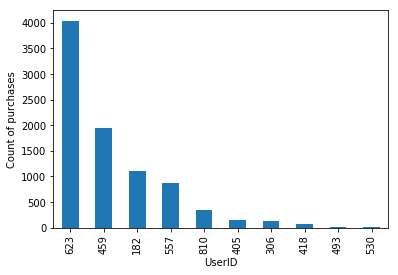

In [6]:
traveldata.query('purchase_any==1 and purchase_own==1').groupby('UserID')['PurchaseID'].\
count().head(10).sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count of purchases')
plt.show()

- From above we can analyze that user "623" have made the most purchase and is one of the valuable customer.

### 3. Lets take a look at the Device type through which touchpoint have been reached

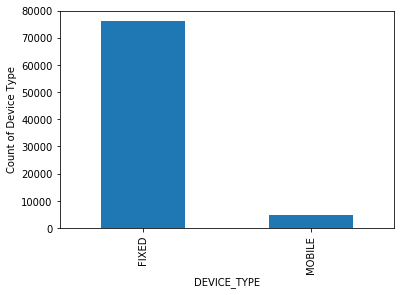

In [7]:
traveldata.query('purchase_any==1 and purchase_own==1').groupby('DEVICE_TYPE')['purchase_any'].\
count().plot(kind='bar')
plt.ylabel('Count of Device Type')
plt.show()

- From above,we can analyze that Fixed i.e. Desktop/Laptop have been used by most users to reach out to touchpoint.

### 4. Checking Type of Touch Points where purchase have been the most 

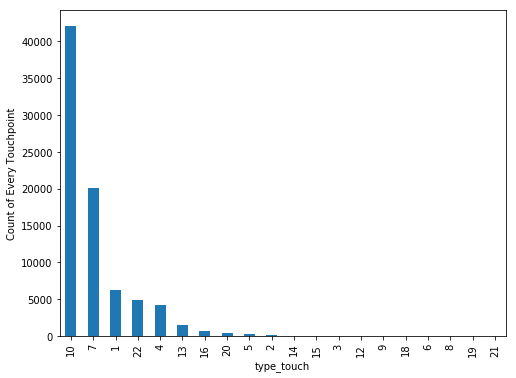

In [8]:
plt.figure(figsize=(8,6))
traveldata.query('purchase_any==1 and purchase_own==1').\
groupby('type_touch')['type_touch'].count().sort_values(ascending=False).\
plot(kind='bar')
plt.ylabel('Count of Every Touchpoint')
plt.show()

- We can analyze from above that Touchpoint10 i.e.Travel agent Website Focus brand have the most count when we consider purchase for the company.

### 5. Lets check the number of months spend by users on Mobile Panel

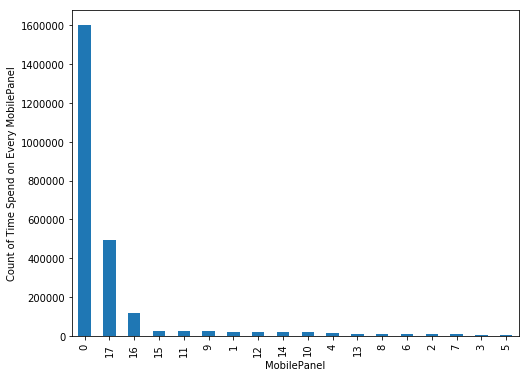

In [9]:
plt.figure(figsize=(8,6))
traveldata.groupby('MobilePanel')['UserID'].count().\
sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count of Time Spend on Every MobilePanel')
plt.show()

- From above,we can analyze that most of the people spend 0 months on Mobile Panel

### 6. Lets check the number of months spend by users on Fixed Panel

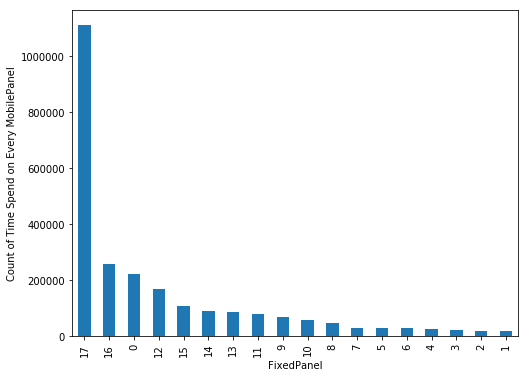

In [10]:
plt.figure(figsize=(8,6))
traveldata.groupby('FixedPanel')['UserID'].count().\
sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count of Time Spend on Every MobilePanel')
plt.show()

- From above,we can analyze that most of the people spend 17 months on Fixed Panel.

### 6. Time spend on Touch Point

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


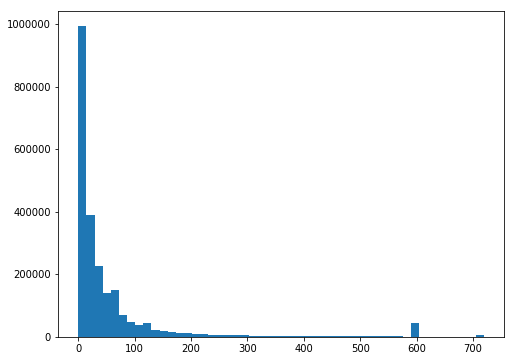

In [11]:
plt.figure(figsize=(8,6))
plt.hist(traveldata['Duration'],bins=50)
plt.show()

- From above,we can analyze that most of the customers have spend 0-100 seconds and there are certain outliers also.

### 7. Lets get the most efficient hour

In [12]:
traveldata['Time']=traveldata['TIMESPSS'].str.split(' ',expand=True)[1]

In [13]:
df1.query('purchase_any==1 and purchase_own==1').query('GenderID=="2.0"')\
['Time'].value_counts().sort_values(ascending=False).head(10)\
.plot(kind='bar')
plt.xlabel('Time as per Females')
plt.ylabel('Count')
plt.show()

NameError: name 'df1' is not defined

- From above we can analyze that customers have made most of the purchase at 14:58:20.So,companies can focus on these hours to make more sales of their products.

### 8. How much purchase was made on weekday and weekend

- Converting Date datatype i.e. object to datetime

In [14]:
traveldata['Date']=pd.to_datetime(traveldata['Date'])

- Getting Day of the week

In [15]:
traveldata['Day of the week']=traveldata['Date'].dt.weekday_name

In [16]:
traveldata['Day of the week'].head()

0    Saturday
1      Sunday
2      Sunday
3    Saturday
4      Friday
Name: Day of the week, dtype: object

- Converting the days into "weekday" and "weekend".

In [17]:
wekday_wekend=[]
for i in traveldata['Day of the week']:
    if i=='Saturday'or i=='Sunday':
        wekday_wekend.append('Weekend')
    else:
        wekday_wekend.append('Weekday')

In [18]:
traveldata['wekday_wekend']=wekday_wekend

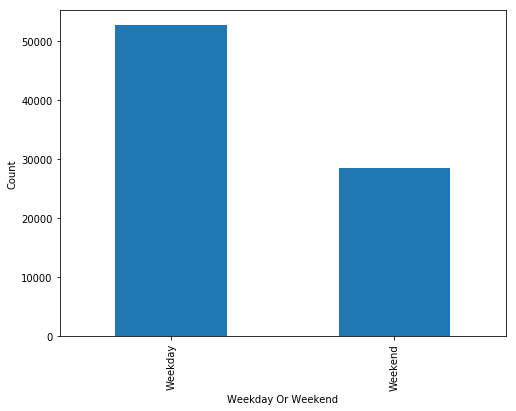

In [19]:
plt.figure(figsize=(8,6))
traveldata.query('purchase_any==1 and purchase_own==1').groupby('wekday_wekend')\
['wekday_wekend'].count().plot(kind='bar')
plt.xlabel('Weekday Or Weekend')
plt.ylabel('Count')
plt.show()

- From above we can analyze that purchase rate is high on weekdays.

#### Merging datasets Travel Data and Travel Data Demo

In [20]:
df=pd.merge(traveldata,traveldemos)
df.head()

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel,...,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage
0,9558,1,2016-03-12 22:18:34,5.786,MOBILE,7,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9558,1,2016-03-13 05:25:49,65.725,MOBILE,7,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9657,2,2015-07-18 13:00:38,57.000,FIXED,4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3,2015-08-07 19:16:59,120.000,FIXED,7,0,0,0,17,...,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0


In [21]:
'''Dropping columns 'TIMESPSS','Day of the week' and 'wekday_wekend'as we have already used the same to extract Date and Time.'''
df=df.drop(['TIMESPSS','Day of the week','wekday_wekend'],axis=1)

In [22]:
df.head()

,UserID,PurchaseID,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel,Date,...,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage
0,9558,1,5.786,MOBILE,7,0,0,0,0,2016-03-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9558,1,65.725,MOBILE,7,0,0,0,0,2016-03-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9558,1,6.492,MOBILE,7,0,0,0,0,2016-03-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9657,2,57.000,FIXED,4,0,0,0,0,2015-07-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3,120.000,FIXED,7,0,0,0,17,2015-08-07,...,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0


# Missing Values Treatment

### Checking for missing values

In [23]:
df.isnull().sum()

UserID                                0
PurchaseID                            0
Duration                         141065
DEVICE_TYPE                           0
type_touch                            0
purchase_own                          0
purchase_any                          0
MobilePanel                           0
FixedPanel                            0
Date                                  0
Time                                  0
SPSS_Regio5                      304929
RESP_GEM_GROOTTE                 304929
BAS_huishoudgrootte              304929
GenderID                         304929
Age                              304929
BAS_werkzaamheid_resp            304929
BAS_bruto_jaarinkomen            304929
afg_kinderen_huishouden          304929
AFG_sk2015                       304929
BAS_voltooide_opleiding8_resp    376318
SPSS_Lifestage                   304929
dtype: int64

- From above we can observe that there are many missing values

### 1. GenderID

In [24]:
df['GenderID'].isnull().sum()

304929

- Converting datatype of GenderID i.e. float to string

In [25]:
df['GenderID']=pd.Series(df['GenderID'],dtype='str')

- Finding mode of GenderID to fill missing values

In [26]:
gender_mode=df['GenderID'].mode()[0]
gender_mode

'2.0'

- Taking only those GenderID into account where customers have purchased from the company and removing others

In [27]:
x=df[(df['purchase_any']==0) & (df['purchase_own']==0) &\
(df['GenderID']=="nan")]['UserID']
df1=df[~df['UserID'].isin(x)]

In [28]:
df1.query('GenderID=="nan"')['UserID'].nunique()

44

In [29]:
df1.query('GenderID=="nan"')

,UserID,PurchaseID,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel,Date,...,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage
49544,170,696,2.000,FIXED,1,0,1,0,11,2015-10-01,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49545,170,696,3.000,FIXED,1,0,1,0,11,2015-10-01,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49546,170,696,21.000,FIXED,1,0,1,0,11,2015-10-01,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49547,170,696,26.000,FIXED,1,0,1,0,11,2015-10-01,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49548,170,696,64.000,FIXED,1,0,1,0,11,2015-10-01,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49549,170,696,2.000,FIXED,1,0,1,0,11,2015-10-01,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49550,170,696,64.000,FIXED,1,0,1,0,11,2015-10-01,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49551,170,696,0.000,FIXED,1,0,1,0,11,2015-10-01,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49552,170,696,0.000,FIXED,1,0,1,0,11,2015-10-01,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49553,170,696,2.000,FIXED,1,0,1,0,11,2015-10-01,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df1=df1.apply(lambda x:x.replace("nan",gender_mode))

In [31]:
df1.query('GenderID=="nan"')

,UserID,PurchaseID,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel,Date,...,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage


- Checking proportion of males and females who purchased from the company

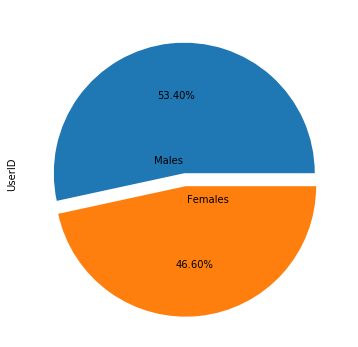

In [32]:
plt.figure(figsize=(8,6))
explode=(0,0.1)
df1.query('purchase_own==1 and purchase_any==1').groupby('GenderID')['UserID']\
.count().plot(kind='pie',autopct='%.2f%%',explode=explode,\
              labels=("Males","Females"),labeldistance=0.1)
plt.show()

### 2. Age

In [33]:
df1['Age']=df1['Age'].bfill()

In [34]:
df1['Age'].isnull().sum()

0

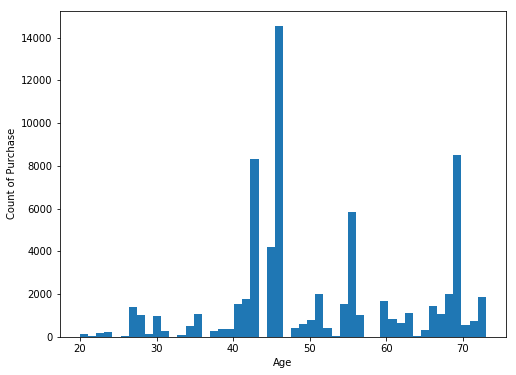

In [35]:
plt.figure(figsize=(8,6))
plt.hist(df1.query('purchase_own==1 and purchase_any==1')['Age'],bins=50)
plt.xlabel('Age')
plt.ylabel('Count of Purchase')
plt.show()

- From above we can analyze that majorly customers are in the range of 40-70,we can target these customers to sell our products.

### 3. SPSS_Regio5

In [36]:
region_mode=df1['SPSS_Regio5'].mode()[0]

In [37]:
df1['SPSS_Regio5']=df1['SPSS_Regio5'].fillna(region_mode)

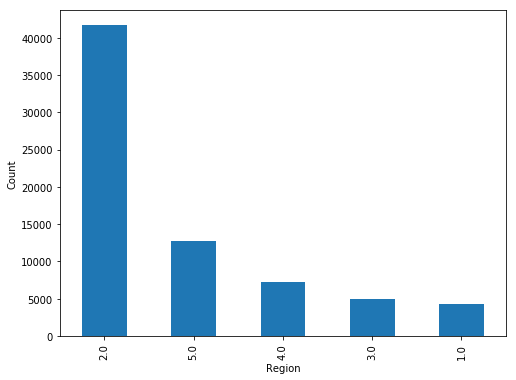

In [38]:
plt.figure(figsize=(8,6))
df1.query('purchase_own==1 and purchase_any==1')['SPSS_Regio5'].value_counts().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

- From above we can analyze that majority of the people are from "West" & "South" side.
Therefore company can majorly focus on these regions.

### 4.  RESP_GEM_GROOTTE                 

In [39]:
df1['RESP_GEM_GROOTTE']=df1['RESP_GEM_GROOTTE'].bfill()

In [40]:
df1['RESP_GEM_GROOTTE'].isnull().sum()

0

### 5. BAS_huishoudgrootte

In [41]:
df1['BAS_huishoudgrootte']=df1['BAS_huishoudgrootte'].bfill()

In [42]:
df1['BAS_huishoudgrootte'].isnull().sum()

0

### 6. BAS_werkzaamheid_resp

In [43]:
df1['BAS_werkzaamheid_resp']=df1['BAS_werkzaamheid_resp'].bfill()

In [44]:
df1['BAS_werkzaamheid_resp'].isnull().sum()

0

### 7. afg_kinderen_huishouden

In [45]:
df1['afg_kinderen_huishouden']=df1['afg_kinderen_huishouden'].bfill()

In [46]:
df1['afg_kinderen_huishouden'].isnull().sum()

0

### 8. AFG_sk2015

In [47]:
df1['AFG_sk2015']=df1['AFG_sk2015'].bfill()

In [48]:
df1['AFG_sk2015'].isnull().sum()

0

### 9. BAS_voltooide_opleiding8_resp

In [49]:
df1['BAS_voltooide_opleiding8_resp']=df1['BAS_voltooide_opleiding8_resp'].ffill()

In [50]:
df1['BAS_voltooide_opleiding8_resp'].isnull().sum()

0

### 10. SPSS_Lifestage

In [51]:
df1['SPSS_Lifestage']=df1['SPSS_Lifestage'].bfill()

In [52]:
df1['SPSS_Lifestage'].isnull().sum()

0

### 11. Duration

In [53]:
df1['Duration']=df1['Duration'].bfill()

In [54]:
df1['Duration'].isnull().sum()

0

### 12. BAS_bruto_jaarinkomen

In [55]:
df1['BAS_bruto_jaarinkomen']=df1['BAS_bruto_jaarinkomen'].bfill()

In [56]:
df1['BAS_bruto_jaarinkomen'].isnull().sum()

0

### Males

In [57]:
x=[18,19,20,21,22]
#Purchased from nowhere
males_notpurchased=len(df1[~df1['type_touch'].isin(x)].\
query('GenderID=="1.0" and purchase_own==0 and purchase_any==0 '))
#Purchased from company
males_pur_own=len(df1[~df1['type_touch'].isin(x)].\
query('GenderID=="1.0" and purchase_own==1 and purchase_any==1'))
#Purchased from competitior
males_pur_comp=len(df1[~df1['type_touch'].isin(x)].\
query('GenderID=="1.0" and purchase_own==0 and purchase_any==1'))

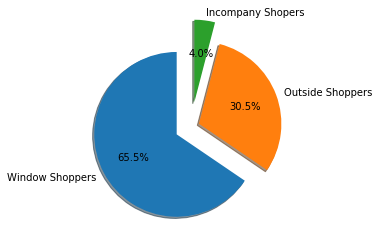

<Figure size 576x432 with 0 Axes>

In [58]:
labels = 'Window Shoppers','Outside Shoppers','Incompany Shopers'
sizes = [males_notpurchased,males_pur_comp,males_pur_own]
explode = (0.2, 0.1, 0.3) 
fig1, ax1 = plt.subplots()
plt.figure(figsize=(8,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Females

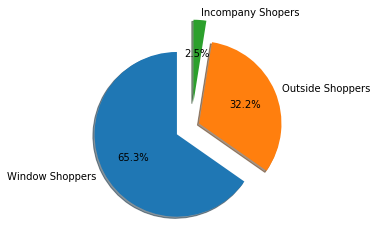

<Figure size 576x432 with 0 Axes>

In [59]:
x=[18,19,20,21,22]
#Purchased from nowhere
females_notpurchased=len(df1[~df1['type_touch'].isin(x)].\
query('GenderID=="2.0" and purchase_own==0 and purchase_any==0 '))
#Purchased from company
females_pur_own=len(df1[~df1['type_touch'].isin(x)].\
query('GenderID=="2.0" and purchase_own==1 and purchase_any==1'))
#Purchased from competitior
females_pur_comp=len(df1[~df1['type_touch'].isin(x)].\
query('GenderID=="2.0" and purchase_own==0 and purchase_any==1'))

labels = 'Window Shoppers','Outside Shoppers','Incompany Shopers'
sizes = [females_notpurchased,females_pur_comp,females_pur_own]
explode = (0.2, 0.1, 0.3) 
fig1, ax1 = plt.subplots()
plt.figure(figsize=(8,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Age

In [60]:
df1['Age_Band']=pd.cut(df1['Age'],bins=[1,25,50,75,100])

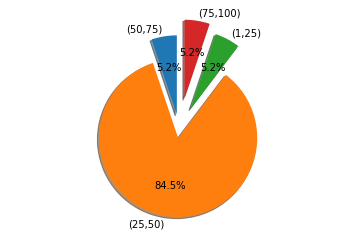

<Figure size 576x432 with 0 Axes>

In [61]:
# Purchase from competitors
x=df1.query('purchase_own==0 and purchase_any==1')['Age_Band'].\
value_counts()

labels=['(50,75)','(25,50)','(1,25)','(75,100)']
sizes = [x[0],x[1],x[2],x[3]]
explode = (0.2, 0.1, 0.3,0.4) 
fig1, ax1 = plt.subplots()
plt.figure(figsize=(8,6))
ax1.pie(sizes, explode=explode,labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

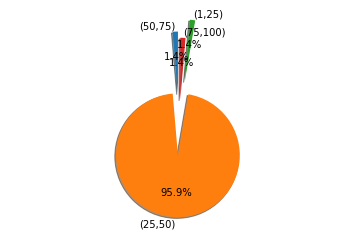

In [62]:
# Purchase from own
x=df1.query('purchase_own==1 and purchase_any==1')['Age_Band'].\
value_counts()

labels=['(50,75)','(25,50)','(1,25)','(75,100)']
sizes = [x[0],x[1],x[2],x[3]]
explode = (0.5, 0.5, 0.7,0.4)

fig1, ax1 = plt.subplots()
#plt.figure()
ax1.pie(sizes, explode=explode,labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Treating Outliers

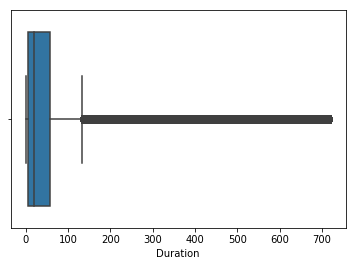

In [63]:
sns.boxplot(df1['Duration'])

In [64]:
Q1=df1['Duration'].quantile(0.25)
Q3=df1['Duration'].quantile(0.75)
IQR=Q3-Q1
ul=Q3+1.5*IQR
ll=Q1-1.5*IQR
df1['Duration']=df1['Duration'].clip_upper(ul)
df1['Duration']=df1['Duration'].clip_lower(ll)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  import sys


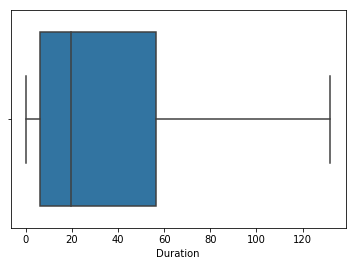

In [65]:
sns.boxplot(df1['Duration'])

# Treating categorical variables

- Removing unnecessary columns

In [66]:
df1=df1.drop(['Date','Time','Age_Band'],axis=1)

In [67]:
df1=pd.get_dummies(df1)

# Changing DataType of Duration to 'int'

In [68]:
df1['Duration']=pd.Series(df1['Duration'],dtype='int')

# Filtring Target Customers

In [69]:
x=[18,19,20,21,22,10,12]
target_dataset=df1[~df1['type_touch'].isin(x)].query('purchase_own==0 and purchase_any==0')
target_dataset=target_dataset.drop(['purchase_own','purchase_any'],axis=1)
target_dataset.shape

(1305496, 20)

# Dividing Data into train and test

In [70]:
# Filtering (1,1) and CIS
x=[18,19,20,21,22,10,12]
df2=df1[~df1['type_touch'].isin(x)].query('purchase_own==0 and purchase_any==1 or purchase_own==1 and purchase_own==1')
df2.shape

(659709, 22)

In [71]:
# Removing column purchase_any as it is not required
new_df=df2.drop(['purchase_any'],axis=1)

In [72]:
X=new_df.drop(['purchase_own'],axis=1)
Y=new_df['purchase_own']

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Building Model

In [74]:
clf=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=5,
                          min_samples_leaf=5,max_depth=4)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('Accuracy Score :',accuracy_score(y_test,y_pred))
print('Confusion Matrix :',confusion_matrix(y_test,y_pred))

Accuracy Score : 0.9584362826090251
Confusion Matrix : [[125753    174]
 [  5310    705]]


# Predicting on Target Customers

In [1]:
target_dataset['purchase_own']=clf.predict(target_dataset)

In [76]:
target_dataset['purchase_own'].value_counts()

0    1299280
1       6216
Name: purchase_own, dtype: int64

In [77]:
target_dataset.query('purchase_own==1').groupby(['UserID','PurchaseID'])\
[['PurchaseID']].count().rename(columns={"PurchaseID":"Count"})

Count
UserID PurchaseID       
89     385             1
       386             2
       387             8
145    613             2
       614            10
       615            15
       616            36
199    830             2
297    1243           10
399    1716            2
       1719           18
425    1829            8
565    2436            2
       2438            1
       2439            4
587    2530            7
       2531            8
773    3294           19
       3295            2
       3296            3
       3297            1
       3298            1
832    3549            3
       3550            1
       3551            6
       3552          235
       3553            2
849    3616            3
       3618            3
1002   4162            5
...                  ...
9191   7315           13
       7316            1
9195   7502            1
9214   11109           6
       11111          30
9230   13210           3
9266   16090          10
9274   17554           3
9310   20807           1
9323   22584           5
9328   22991           1
       22992           1
9349   25043           8
       25044           3
9388   28198          61
       28199           3
9397   1243            2
       1244            1
       1245            1
       1246            1
       1247            1
       1248            1
9407   5605            1
9442   13210           7
9534   19539           1
9540   24107           1
       24109           7
9585   6414           11
       6415            8
9652   27834           5

[241 rows x 1 columns]

In [78]:
probs=clf.predict_proba(x_test)
from sklearn import metrics
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area Under the curve : ',roc_auc)

Area Under the curve :  0.7243546708812765


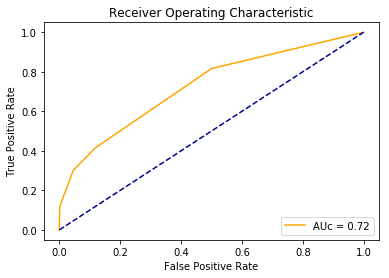

In [79]:
#Plotting
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUc = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model on Top of the other one

In [80]:
# Filtering (1,1) and CIS
x=[18,19,20,21,22,10,12]
df2=df1[~df1['type_touch'].isin(x)].query('purchase_own==0 and purchase_any==1 or purchase_own==0 and purchase_own==0')
df2.shape

(1935222, 22)

In [81]:
new_df1=df2.drop(['purchase_own'],axis=1)

In [82]:
X=new_df1.drop(['purchase_any'],axis=1)
Y=new_df1['purchase_any']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [84]:
clf=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=20,
                          min_samples_leaf=10,max_depth=15)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('Accuracy Score :',accuracy_score(y_test,y_pred))
print('Confusion Matrix :',confusion_matrix(y_test,y_pred))

Accuracy Score : 0.6898681031921353
Confusion Matrix : [[242189  18841]
 [101194  24821]]


In [85]:
new_target=target_dataset.query('purchase_own==0').drop(['purchase_own'],axis=1)

In [86]:
new_target['purchase_any']=clf.predict(new_target)

In [87]:
new_target['purchase_any'].value_counts()

0    1205041
1      94239
Name: purchase_any, dtype: int64

Area Under the curve :  0.6865519817415345


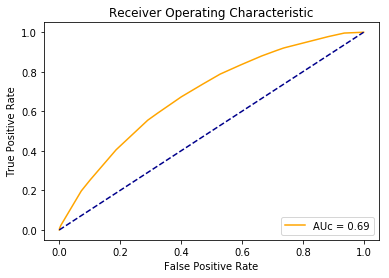

In [88]:
probs=clf.predict_proba(x_test)
from sklearn import metrics
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area Under the curve : ',roc_auc)
#Plotting
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUc = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()